In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from sklearn.datasets import fetch_20newsgroups

# Load dataset
dataset = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
documents = dataset.data

In [8]:
import re
import spacy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [9]:
# Initialize Spacy for preprocessing
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def preprocess_text_spacy(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Lemmatize and remove stop words
    doc = nlp(text.lower())
    return [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

# Apply preprocessing to all documents
processed_docs = [preprocess_text_spacy(doc) for doc in documents]

In [11]:
import gensim
from gensim import corpora

# Create dictionary and corpus for LDA
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Train LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=5)  # Reduced passes

# Print the topics discovered
topics = lda_model.print_topics()
for topic in topics:
    print(topic)

(0, '0.011*"god" + 0.010*"not" + 0.007*"people" + 0.006*"know" + 0.006*"write" + 0.005*"think" + 0.005*"subject" + 0.005*"say" + 0.004*"believe" + 0.004*"line"')
(1, '0.016*"not" + 0.010*"write" + 0.010*"line" + 0.009*"organization" + 0.009*"subject" + 0.008*"article" + 0.006*"think" + 0.005*"like" + 0.005*"s" + 0.005*"people"')
(2, '0.010*"x" + 0.009*"file" + 0.008*"line" + 0.007*"subject" + 0.007*"window" + 0.006*"use" + 0.006*"image" + 0.006*"organization" + 0.006*"program" + 0.006*"key"')
(3, '0.012*"line" + 0.012*"subject" + 0.011*"organization" + 0.007*"not" + 0.006*"m" + 0.006*"university" + 0.005*"drive" + 0.005*"write" + 0.005*"nntppostinghost" + 0.004*"know"')
(4, '0.008*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.006*"armenian" + 0.005*"israel" + 0.004*"jews" + 0.004*"war" + 0.004*"people" + 0.003*"israeli" + 0.003*"turkish" + 0.003*"arab" + 0.003*"new"')


In [12]:
!pip install pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

In [13]:
from gensim.models import Word2Vec

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=processed_docs, vector_size=100, window=5, min_count=1, workers=4)

# Get word vector for a specific word
vector = word2vec_model.wv['example']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
from gensim.matutils import sparse2full

# Number of topics in the LDA model
num_topics = lda_model.num_topics

# Generate document vectors using LDA topic distributions
doc_vectors = [sparse2full(lda_model.get_document_topics(bow), num_topics) for bow in corpus]

# Compute cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity matrix between document vectors
similarity_matrix = cosine_similarity(doc_vectors)

# Optionally print the similarity matrix
print(similarity_matrix)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[1.         0.         0.40813646 ... 0.         0.11095149 0.        ]
 [0.         0.99999994 0.01010887 ... 0.9846666  0.01977564 0.9994919 ]
 [0.40813646 0.01010887 0.99999994 ... 0.00135836 0.08973664 0.00853316]
 ...
 [0.         0.9846666  0.00135836 ... 1.         0.00265731 0.9897267 ]
 [0.11095149 0.01977564 0.08973664 ... 0.00265731 1.         0.01669314]
 [0.         0.9994919  0.00853316 ... 0.9897267  0.01669314 1.        ]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


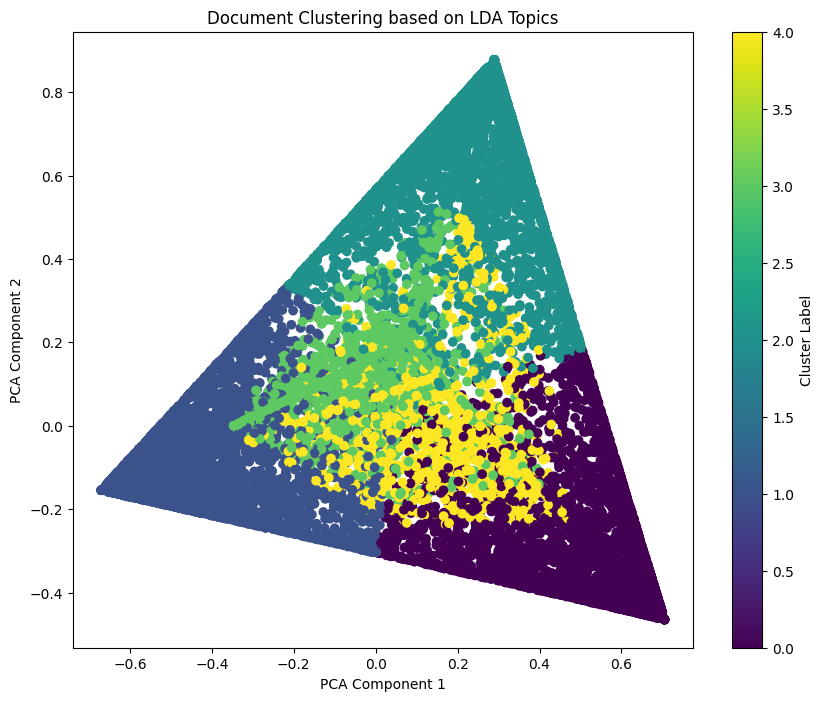

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import gensim
from gensim import corpora

# Assuming `processed_docs` and `lda_model` are already defined

# Create dictionary and corpus for LDA
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Train LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=5)

# Generate document vectors using LDA topic distributions
num_topics = lda_model.num_topics
doc_vectors = [gensim.matutils.sparse2full(lda_model.get_document_topics(bow), num_topics) for bow in corpus]

# Perform KMeans clustering on the document vectors
num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state=0)
km.fit(doc_vectors)

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
topic_vectors = pca.fit_transform(doc_vectors)

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(topic_vectors[:, 0], topic_vectors[:, 1], c=km.labels_, cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Document Clustering based on LDA Topics')
plt.colorbar(label='Cluster Label')
plt.show()


In [ ]:
frofrom gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=processed_docs, vector_size=100, window=5, min_count=1, workers=4)

# Create document vectors by averaging word embeddings
def document_vector(doc):
    word_vectors = [word2vec_model.wv[word] for word in doc if word in word2vec_model.wv]
    if len(word_vectors) == 0:
        return np.zeros(word2vec_model.vector_size)
    return np.mean(word_vectors, axis=0)

doc_vectors = np.array([document_vector(doc) for doc in processed_docs])

# Perform KMeans clustering on the document vectors
num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state=0)
km.fit(doc_vectors)

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
topic_vectors = pca.fit_transform(doc_vectors)

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(topic_vectors[:, 0], topic_vectors[:, 1], c=km.labels_, cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Document Clustering based on Word Embeddings')
plt.colorbar(label='Cluster Label')
plt.show()